In [1]:
import torch
import torch.nn as nn
import pickle
import pandas as pd
import numpy as np
from RL_Train import Q_Network, Environment
from RL_Train import input_size, hidden_size, output_size
from RL_Train import baseline

/home/renato/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/renato/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LinearRegression from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


1	0.954500000000005	656	512081.8335665654	47281618.140039064	6.932698726654053
2	0.8570000000000157	1631	447964.41372975084	54922498.262304686	8.65096378326416


In [2]:
Q = Q_Network(input_size, hidden_size, output_size)
Q.load_state_dict(torch.load('./Q_state.torch'))

<All keys matched successfully>

In [3]:
with open('./lr_cellphone_C.pkl','rb') as f:
    model = pickle.load(f)

/home/renato/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LinearRegression from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [4]:
df = pd.read_csv('df.csv')

In [5]:
test_env = Environment(model, df)
test_acts=[]
test_rewards = []
orders = []
o_prices = []
pobs = test_env.reset()
profits_2 = 0
pact_history = []
done = False
while not done:
    Q.eval()
    
    pact = Q(torch.from_numpy(np.array(pobs, dtype=np.float32).reshape(1, -1)))
    pact = np.argmax(pact.data.cpu())
    pact_history.append(pact)
    test_acts.append(pact.item())
    
    obs, reward, done = test_env.step(pact.numpy())
    orders.append(obs[1])
    o_prices.append(obs[0])
    test_rewards.append(reward)
    profits_2 += reward
    pobs = obs

test_profits = test_env.profits

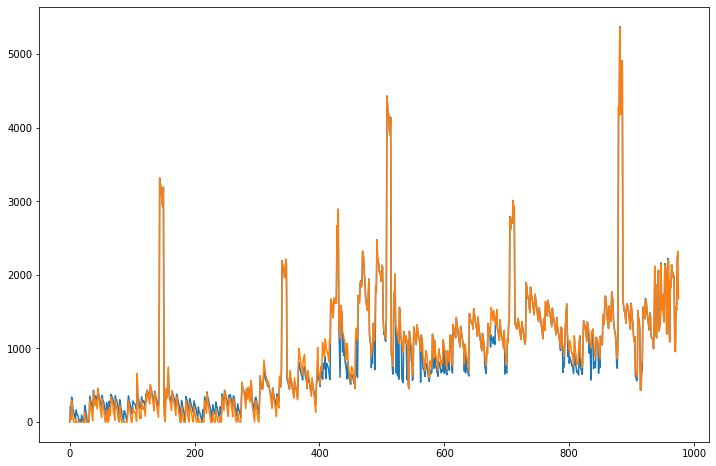

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(test_rewards)
plt.plot(baseline)